# SENIOR HIGH

### Formula in getting the k_range

In [8]:
# formula in getting the k range by calculating the Square Root of Half the Sample Size
import math
import pandas as pd

df = pd.read_csv('C:/Thesis Refactor/APP/dataset/SHS.csv')

df_cebu = df[
    df['province'].str.contains('Cebu', na=False, case=False) |
    df['full_address'].str.contains('Cebu', na=False, case=False)
]

n = len(df_cebu)
upper_limit_k = math.sqrt(n / 2)
upper_limit_k = round(upper_limit_k)

print(f"Sample size: {n}")
print(f"Upper limit for k (Square Root of Half the Sample Size): {upper_limit_k}")

Sample size: 1624
Upper limit for k (Square Root of Half the Sample Size): 28


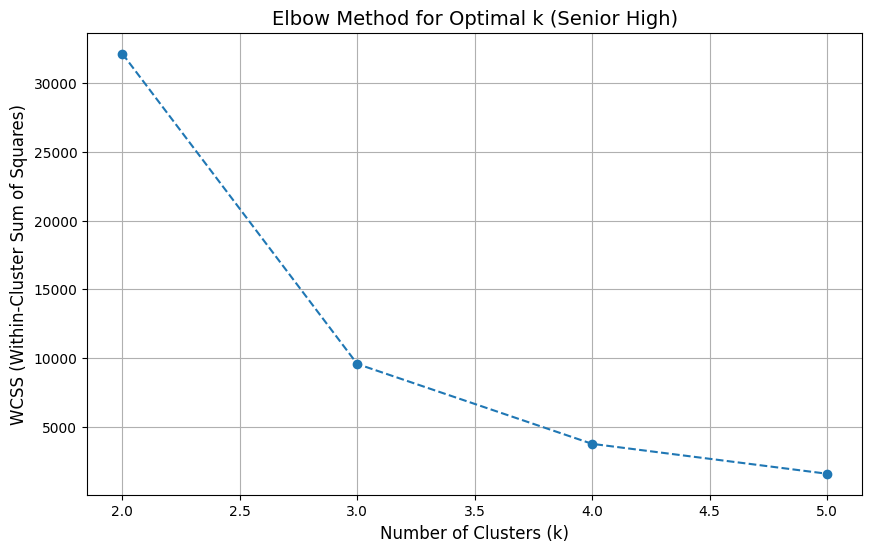

In [1]:
# get optimal k senior high student data elbow method

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Set CPU limit
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load data
file_path = 'C:/Thesis Refactor/APP/dataset/shs.csv'
df = pd.read_csv(file_path)

# Remove missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

wcss = []

K_range = range(2, 28)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k (Senior High)', fontsize=14)
plt.grid(True)
plt.show()


Sample size (Cebu-based students): 81
Upper limit for k (√(n/2)): 6
Silhouette Score for k=2: 0.8876
Silhouette Score for k=3: 0.5249
Silhouette Score for k=4: 0.5300
Silhouette Score for k=5: 0.5050
Silhouette Score for k=6: 0.5296


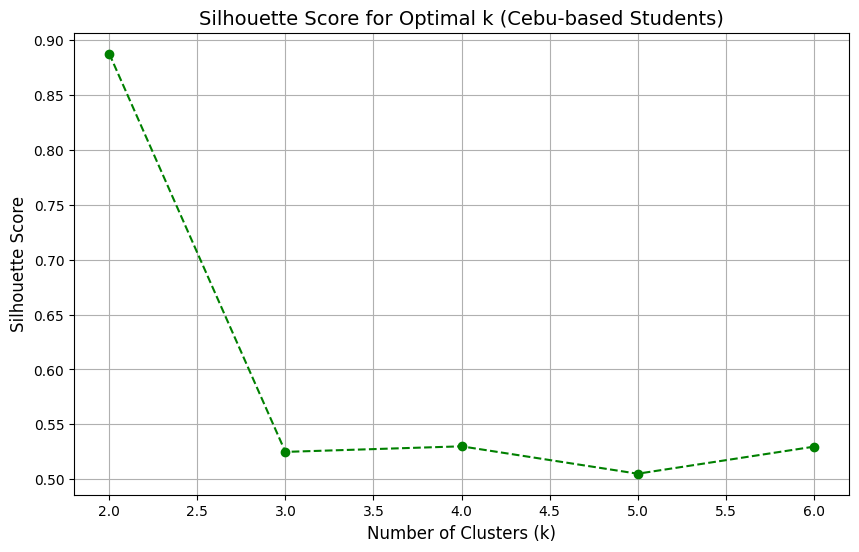

Optimal k based on Silhouette Score: 2
Best Silhouette Score: 0.8876


In [13]:
# get optimal k senior high student data elbow method silhouette score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Set CPU limit
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load data
file_path = 'C:/Thesis Refactor/APP/dataset/shs.csv'
df = pd.read_csv(file_path)

# Remove missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

# Store Silhouette Scores
silhouette_scores = []

K_range = range(2, 28)

# Perform K-means clustering for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    
    # Compute Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k (Senior High)', fontsize=14)
plt.grid(True)
plt.show()


# COLLEGE

In [2]:
# formula in getting the k range by calculating the Square Root of Half the Sample Size

import math
import pandas as pd

df = pd.read_csv('C:/Thesis Refactor/APP/dataset/college.csv')

df_cebu = df[
    df['province'].str.contains('Cebu', na=False, case=False) |
    df['full_address'].str.contains('Cebu', na=False, case=False)
]


n = len(df_cebu)
upper_limit_k = math.sqrt(n / 2)
upper_limit_k = round(upper_limit_k)

print(f"Sample size: {n}")
print(f"Upper limit for k (Square Root of Half the Sample Size): {upper_limit_k}")

Sample size: 6628
Upper limit for k (Square Root of Half the Sample Size): 58


✅ Optimal k based on Elbow Method: 10


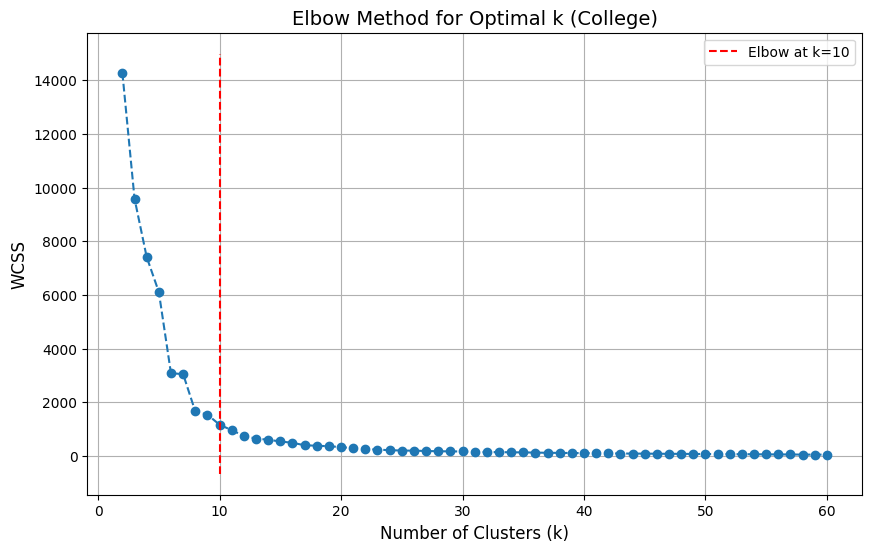

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
import os

# Limit CPU usage (optional)
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load data
file_path = 'C:/Thesis Refactor/APP/dataset/college.csv'
df = pd.read_csv(file_path)

# Clean coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

X = df[['latitude', 'longitude']].values

# Compute WCSS
wcss = []
K_range = range(2, 61)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Detect elbow point automatically
kl = KneeLocator(K_range, wcss, curve='convex', direction='decreasing')
optimal_k = kl.elbow

# 🖨️ Print the result
print(f"✅ Optimal k based on Elbow Method: {optimal_k}")

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], colors='red', linestyles='dashed', label=f'Elbow at k={optimal_k}')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method for Optimal k (College)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Optimal k: 2
Highest Silhouette Score: 0.9970

Top 5 k values with highest Silhouette Scores:
k=2, score=0.9970
k=3, score=0.9928
k=4, score=0.9875
k=5, score=0.8154
k=7, score=0.7516


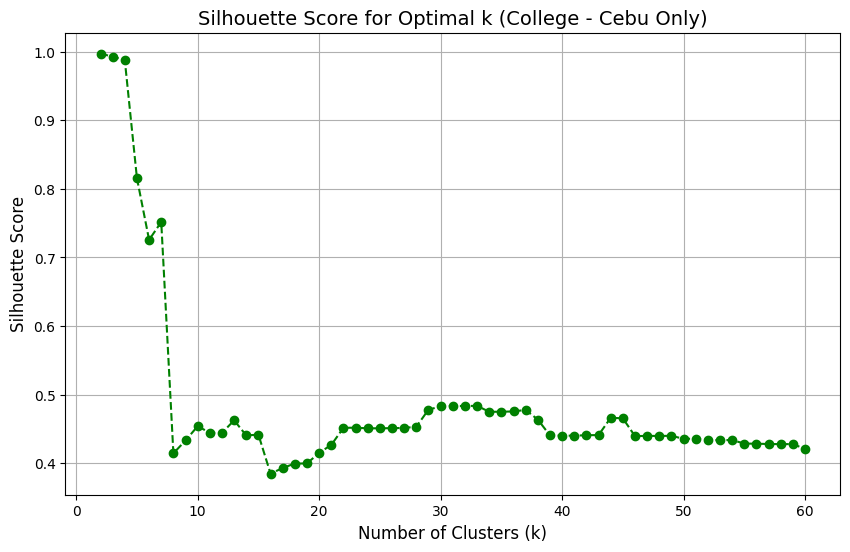

In [2]:
# get optimal k college student data silhouette score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Set CPU limit
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load data
file_path = 'C:/Thesis Refactor/APP/dataset/college.csv'
df = pd.read_csv(file_path)

# Remove missing or invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])
df = df[(df['latitude'] != 0) & (df['longitude'] != 0)]

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

# Store Silhouette Scores
silhouette_scores = []

K_range = range(2, 58)

# Perform K-means clustering for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    
    # Compute Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k (College)', fontsize=14)
plt.grid(True)
plt.show()


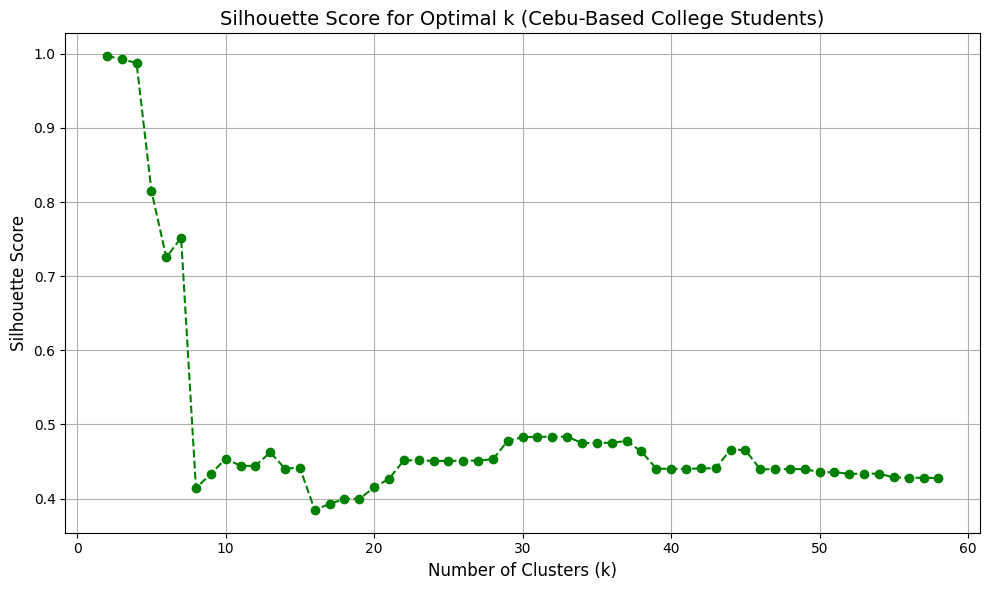

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Optional: Set CPU limit (if needed in your environment)
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

# Load CSV
file_path = 'C:/Thesis Refactor/APP/dataset/college.csv'
df = pd.read_csv(file_path)

# Normalize text to avoid NaN and enable case-insensitive matching
df['province'] = df['province'].fillna('').str.lower()
df['full_address'] = df['full_address'].fillna('').str.lower()

# Filter only Cebu-based entries
df_cebu = df[
    df['province'].str.contains('cebu') |
    df['full_address'].str.contains('cebu')
]

# Remove rows with invalid or missing coordinates
df_cebu = df_cebu.dropna(subset=['latitude', 'longitude'])
df_cebu = df_cebu[(df_cebu['latitude'] != 0) & (df_cebu['longitude'] != 0)]

# Extract coordinates
X = df_cebu[['latitude', 'longitude']].values

# Check if there's enough data to proceed
if len(X) < 2:
    raise ValueError("Not enough valid Cebu-based student data for clustering.")

# Define range for k
K_range = range(2, max(3, round(np.sqrt(len(X) / 2)) + 1))

# Compute Silhouette Scores
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Optimal k (Cebu-Based College Students)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
